In [20]:
import numpy as np
import matplotlib.pyplot as plt
# from utils import *
import copy 
import math
%matplotlib inline


In [12]:
# import lab_utils_common
# import lab_utils_multi
from utilss import *
# python -m pip install utils

In [13]:
x_train, y_train = load_data()

In [14]:
print("Type of x_train: ", type(x_train))
print("First five elements of x_train are:/n", x_train[:5])

Type of x_train:  <class 'numpy.ndarray'>
First five elements of x_train are:/n [6.1101 5.5277 8.5186 7.0032 5.8598]


In [15]:
print("Type of y_train:", type(y_train))
print("First 5 elements of y_train:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First 5 elements of y_train:
 [17.592   9.1302 13.662  11.854   6.8233]


In [18]:
print('The Shape of x_train is:', x_train.shape)
print('The shape of y_train is:', y_train.shape)
print('Number of training examples (m):', len(x_train))

The Shape of x_train is: (97,)
The shape of y_train is: (97,)
Number of training examples (m): 97


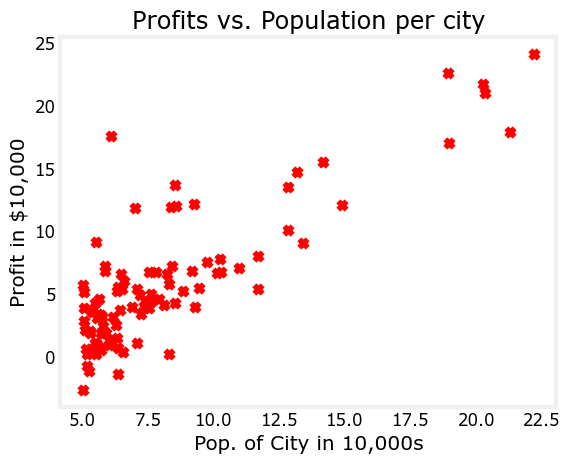

In [21]:
plt.scatter(x_train, y_train, marker='x', c='r')

plt.title('Profits vs. Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Pop. of City in 10,000s')
plt.show()

In [23]:
def compute_cost(x, y , w, b): # cost function
    
    m = x.shape[0]
    total_cost = 0
    cost_sum = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2* m)) * cost_sum
    return total_cost



In [26]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


In [35]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0



    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i] )* x[i]
        dj_db_i = (f_wb - y[i]) 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = (1 /m ) * dj_dw
    dj_db = (1 /m ) * dj_db
    return dj_dw, dj_db


        

In [36]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w,b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w,b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [37]:
test_w = 0.2
test_b = 0.2

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)
print('Gradient at test w,b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at test w,b (zeros): -47.41610118114434 -4.007175051546391
Using X with shape (4, 1)
All tests passed!


In [40]:
# print(x_train.shape[0])

97


In [41]:
def gradient_descent(x,y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x , y ,w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x , y ,w ,b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")

    return w, b , J_history, w_history

In [42]:
initial_w = 0
initial_b = 0

iterations = 1500
alpha = 0.01

w,b,_,_  = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w,)

Iteration    0: Cost     6.74 
Iteration  150: Cost     5.31 
Iteration  300: Cost     4.96 
Iteration  450: Cost     4.76 
Iteration  600: Cost     4.64 
Iteration  750: Cost     4.57 
Iteration  900: Cost     4.53 
Iteration 1050: Cost     4.51 
Iteration 1200: Cost     4.50 
Iteration 1350: Cost     4.49 
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [48]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b
predicted

array([ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
        6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
        3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
        2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
        3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
       18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
        2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
        5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
        2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
        4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
        5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
        3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
        6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
        4.78874528,  6.04480089,  8.30859358,  2.78400167, 20.09

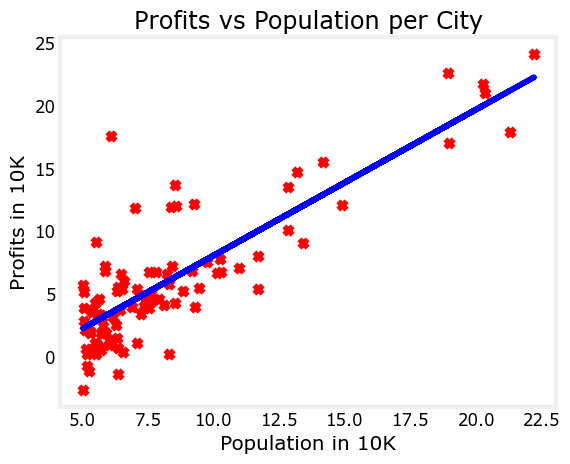

In [49]:
plt.plot(x_train, predicted, c = 'b')
plt.scatter(x_train, y_train, marker = 'x', c = 'r')

plt.title("Profits vs Population per City")
plt.ylabel("Profits in 10K")
plt.xlabel("Population in 10K")

plt.show()

In [50]:
predict1 = 3.5 * w + b
print("For 35K Pop, profit of $%.2f" % (predict1*10000))

predict2 = 7.0 * w + b
print('For 70k population, Profit: $%.2f' % (predict2*10000))

For 35K Pop, profit of $4519.77
For 70k population, Profit: $45342.45
